In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
print(df['avg_glucose_level'].min())
print(df['avg_glucose_level'].max())
print("")
print(df['bmi'].min())
print(df['bmi'].max())

55.12
271.74

10.3
97.6


### Explore data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.bmi.isna().sum()

201

In [8]:
#Dropping the empty rows where bmi is N/A

df = df.dropna(subset=['bmi'], axis=0)

In [9]:
df.bmi.isna().sum()

0

In [10]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
df.drop(['id', 'ever_married'], axis=1, inplace=True)

In [12]:
df

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Private,Rural,166.29,25.6,formerly smoked,0


In [13]:
df.corr(numeric_only = True)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.274425,0.257123,0.235838,0.333398,0.232331
hypertension,0.274425,1.000000,0.115991,0.180543,0.167811,0.142515
heart_disease,0.257123,0.115991,1.000000,0.154525,0.041357,0.137938
avg_glucose_level,0.235838,0.180543,0.154525,1.000000,0.175502,0.138936
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.232331,0.142515,0.137938,0.138936,0.042374,1.000000


<Axes: >

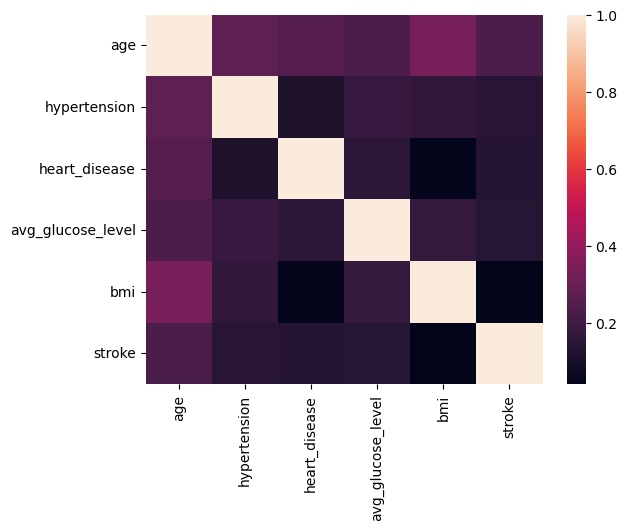

In [14]:
sns.heatmap(df.corr(numeric_only = True))

In [15]:
df.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [16]:
# Just some fun
df.loc[df['gender'] == 'Other', 'gender'] = 'Not sure'

In [17]:
df.gender.unique()

array(['Male', 'Female', 'Not sure'], dtype=object)

In [18]:
df.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [19]:
df.Residence_type.unique()

array(['Urban', 'Rural'], dtype=object)

In [20]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

### Encode data

In [21]:
#Converting the categorical features into numerical
from sklearn.preprocessing import LabelEncoder

le_gender = LabelEncoder()
df.gender = le_gender.fit_transform(df.gender)

In [22]:
df.gender.unique()

array([1, 0, 2])

In [23]:

le_work = LabelEncoder()
df.work_type = le_work.fit_transform(df.work_type)

In [24]:
df.work_type.unique()

array([2, 3, 0, 4, 1])

In [25]:
le_residence = LabelEncoder()
df.Residence_type = le_residence.fit_transform(df.Residence_type)

In [26]:
df.Residence_type.unique()

array([1, 0])

In [27]:
le_smokes = LabelEncoder()
df.smoking_status = le_smokes.fit_transform(df.smoking_status)

In [28]:
df.smoking_status.unique()

array([1, 2, 3, 0])

In [29]:
df.head()

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,2,1,171.23,34.4,3,1
4,0,79.0,1,0,3,0,174.12,24.0,2,1
5,1,81.0,0,0,2,1,186.21,29.0,1,1


In [30]:
X = df.drop(['stroke'],axis = 1)
y = df['stroke']

In [31]:
# Checking for classification error on the target feature

y.value_counts()

stroke
0    4700
1     209
Name: count, dtype: int64

In [32]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error

In [33]:

# Under sample imbalanced data

rs = RandomUnderSampler()
X, y = rs.fit_resample(X, y)

In [34]:
X

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1420,0,37.0,0,0,2,1,70.75,35.8,0
2164,0,49.0,0,0,3,1,149.13,42.9,3
3360,1,82.0,0,1,3,1,228.92,27.9,1
1706,0,41.0,0,0,0,0,78.93,30.9,1
3812,0,26.0,0,0,0,1,90.35,38.6,0
...,...,...,...,...,...,...,...,...,...
243,0,68.0,1,1,2,1,247.51,40.5,1
244,1,57.0,0,0,2,0,84.96,36.7,0
245,0,14.0,0,0,4,0,57.93,30.9,0
246,0,75.0,0,0,3,0,78.80,29.3,1


In [35]:
y.value_counts()

stroke
0    209
1    209
Name: count, dtype: int64

In [36]:
# Split into train & test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [37]:
rf_classifier = RandomForestClassifier()

In [38]:
rf_classifier.fit(X_train.values, y_train.values)

RandomForestClassifier()

In [39]:
# Predict
y_pred = rf_classifier.predict(X_test)

c:\Users\adesa\AppData\Local\anaconda3\envs\ml\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [40]:
# Print classification report

print(classification_report(y_pred, y_test)) 

              precision    recall  f1-score   support

           0       0.74      0.81      0.77        48
           1       0.83      0.75      0.79        57

    accuracy                           0.78       105
   macro avg       0.78      0.78      0.78       105
weighted avg       0.79      0.78      0.78       105



In [41]:

error = np.sqrt(mean_squared_error(y_test, y_pred))
print("{:,.02f}".format(error))

0.47


In [42]:
X_test['pred'] = y_pred
X_test['y_test'] = y_test

X_test[X_test.loc[:, 'y_test']==1]

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,pred,y_test
135,0,71.0,0,0,0,1,263.32,38.7,2,1,1
138,1,76.0,1,0,3,0,194.37,27.0,1,1,1
216,1,78.0,0,0,3,1,116.10,27.1,2,1,1
61,0,80.0,1,0,2,0,74.90,22.2,2,1,1
246,0,75.0,0,0,3,0,78.80,29.3,1,1,1
220,1,81.0,1,1,2,1,250.89,28.1,3,1,1
244,1,57.0,0,0,2,0,84.96,36.7,0,0,1
243,0,68.0,1,1,2,1,247.51,40.5,1,1,1
242,1,68.0,0,0,2,0,233.94,42.4,2,1,1
206,0,81.0,0,0,2,0,80.13,23.4,2,1,1


In [43]:
X_test[X_test.loc[:, 'y_test']==0]

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,pred,y_test
4215,0,13.00,0,0,4,0,138.44,34.8,0,0,0
2046,0,52.00,0,0,2,1,120.25,28.2,0,0,0
918,0,77.00,0,0,2,0,115.29,32.9,0,1,0
4052,0,74.00,0,0,3,1,68.18,27.3,1,1,0
4469,0,28.00,0,0,0,0,77.99,32.0,3,0,0
2095,0,68.00,0,0,2,0,97.96,31.3,2,1,0
1798,0,56.00,0,0,3,1,224.63,42.8,2,1,0
2706,0,54.00,0,0,2,1,99.83,22.7,1,0,0
2848,1,63.00,0,0,2,1,222.66,37.0,1,1,0
4355,0,79.00,1,0,3,0,76.64,19.5,2,1,0


In [44]:
X_test.drop(['pred', 'y_test'], axis=1, inplace=True)


In [45]:
# Evaluate model performance

rf_classifier.score(X_test, y_test)

c:\Users\adesa\AppData\Local\anaconda3\envs\ml\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.780952380952381

### Test model with input parameters

In [46]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 135 to 826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             105 non-null    int32  
 1   age                105 non-null    float64
 2   hypertension       105 non-null    int64  
 3   heart_disease      105 non-null    int64  
 4   work_type          105 non-null    int32  
 5   Residence_type     105 non-null    int32  
 6   avg_glucose_level  105 non-null    float64
 7   bmi                105 non-null    float64
 8   smoking_status     105 non-null    int32  
dtypes: float64(3), int32(4), int64(2)
memory usage: 6.6 KB


### Simulate the app's behaviour by inputting some details as placeholder

In [47]:
X_test =  np.array([['Male', 27, 0, 0, 'Govt_job',
       'Rural', 43, 23, 'never smoked']])


In [48]:
X_test

array([['Male', '27', '0', '0', 'Govt_job', 'Rural', '43', '23',
        'never smoked']], dtype='<U12')

In [49]:
X_test[:,0] = le_gender.transform(X_test[:,0])
X_test[:,4] = le_work.transform(X_test[:,4])
X_test[:,5] = le_residence.transform(X_test[:,5])
X_test[:,8] = le_smokes.transform(X_test[:,8])
X_test = X_test.astype(float)
X_test

array([[ 1., 27.,  0.,  0.,  0.,  0., 43., 23.,  2.]])

In [50]:
pre = rf_classifier.predict(X_test)
print(pre[0])
print(pre)

0
[0]


### Save model as a pickle file

In [51]:
import pickle

In [52]:

data = {"model": rf_classifier, "le_gender": le_gender, "le_work":le_work, "le_residence":le_residence, "le_smokes":le_smokes}
with open('model.pkl','wb') as file: #Open pickle file in 'write binary(wb)' mode
    pickle.dump(data, file)

In [53]:

with open('model.pkl', 'rb') as file:
    data = pickle.load(file)

rf_classifier_loaded = data["model"]
le_gender = data["le_gender"]
le_work = data["le_work"]
le_residence = data["le_residence"]
le_smokes = data["le_smokes"]

In [55]:
pre = rf_classifier_loaded.predict(X_test)
print(pre[0])
print(pre)

0
[0]
